In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import pandas as pd
import anndata
import copy
import scanpy as sc
import pickle
from numpy.linalg import norm
from sklearn.metrics import normalized_mutual_info_score
from numpy.linalg import norm
import tqdm
import spatialcell as cs
import copy

In [2]:
with open('results_example/so.pkl', 'rb') as file:
    so = pickle.load(file)

In [3]:
adata = sc.read_10x_mtx('../square_002um/filtered_feature_bc_matrix')
adata.obs

""
s_002um_02448_01644-1
s_002um_00700_02130-1
s_002um_00305_01021-1
s_002um_02703_00756-1
s_002um_02278_00850-1
...
s_002um_02189_01783-1
s_002um_01609_01578-1
s_002um_00456_02202-1
s_002um_00292_01011-1


In [4]:
adata = copy.deepcopy(adata[so.df[so.df.in_tissue == 1]['barcode']])
adata.obs

""
s_002um_02448_01644-1
s_002um_00700_02130-1
s_002um_00305_01021-1
s_002um_02703_00756-1
s_002um_02278_00850-1
...
s_002um_02189_01783-1
s_002um_01609_01578-1
s_002um_00456_02202-1
s_002um_00292_01011-1


In [5]:
sc.pp.filter_genes(adata, min_counts=1000) 

In [6]:
cs.nuclei_rna(adata,so)

100%|██████████| 37611/37611 [00:52<00:00, 718.33it/s]


In [7]:
with open("results_example/so1.pkl", 'wb') as f:
    pickle.dump(so, f)

#with open('results_example/so1.pkl', 'rb') as file:
#    so = pickle.load(file)

In [8]:
adata_sc = anndata.AnnData(X=copy.deepcopy(csr_matrix(so.final_nuclei)),
                        obs=pd.DataFrame([],index = list(np.sort(np.array(so.cell_ids)))),
                        var=adata.var)
adata_sc

/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 37611 × 9970
    var: 'gene_ids', 'feature_types'

In [9]:
sc.pp.filter_cells(adata_sc, min_counts=3)

In [10]:
adata_raw = copy.deepcopy(adata_sc)

Starting mt
Starting normalization


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


Starting PCA
Starting UMAP


2024-06-03 05:15:21.315990: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 05:15:21.344628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 05:15:21.344650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 05:15:21.345539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 05:15:21.350582: I tensorflow/core/platform/cpu_feature_guar

Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


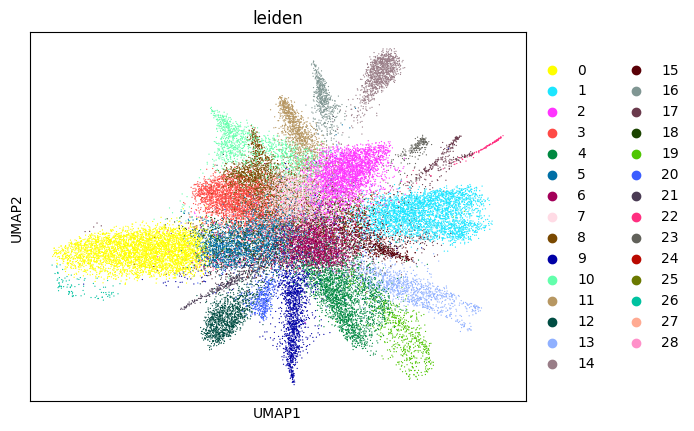

In [11]:
adata_sc = cs.singlecellanalysis(adata_sc,resolution=2)

In [12]:
adata_sc.write_h5ad("results_example/adata_sc.h5ad")

100%|██████████| 37510/37510 [00:43<00:00, 852.83it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


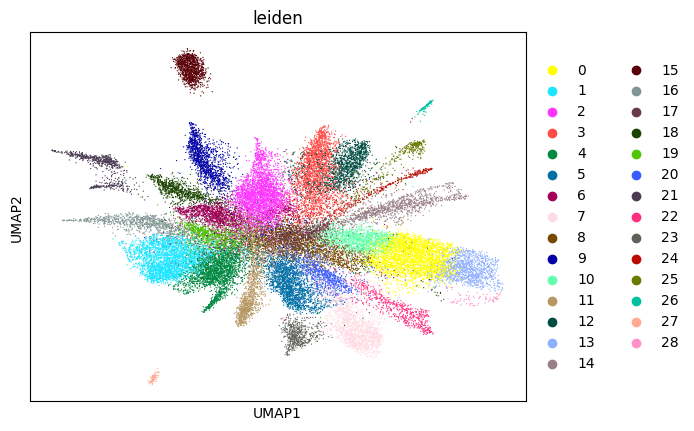

0.4970789174838849 1


100%|██████████| 37510/37510 [00:43<00:00, 856.90it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


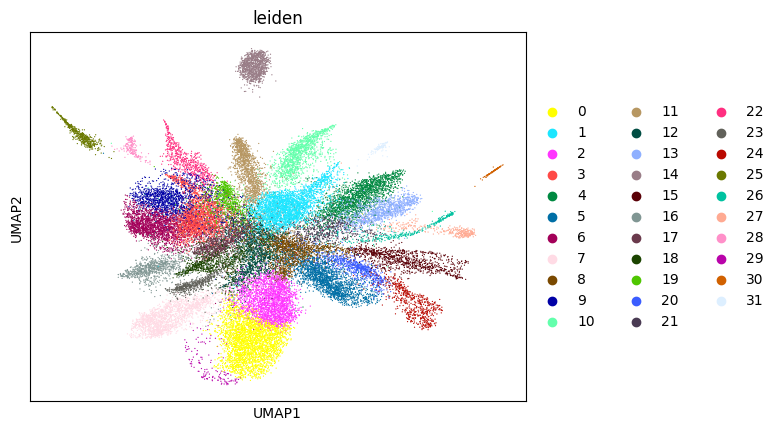

0.7237056622360897 2


100%|██████████| 37510/37510 [00:44<00:00, 850.95it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


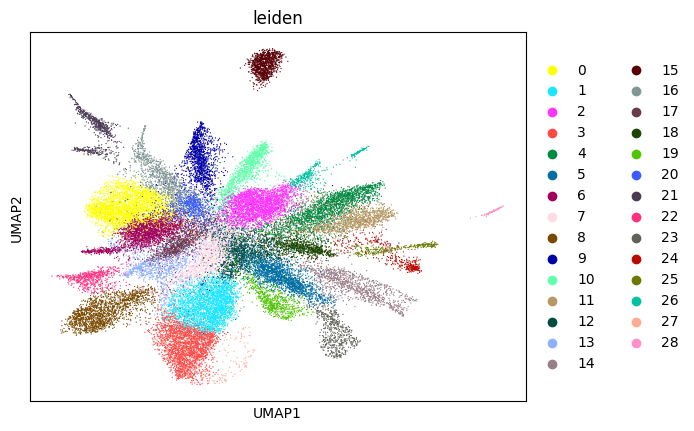

0.7581145417753842 3


100%|██████████| 37510/37510 [00:43<00:00, 854.11it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


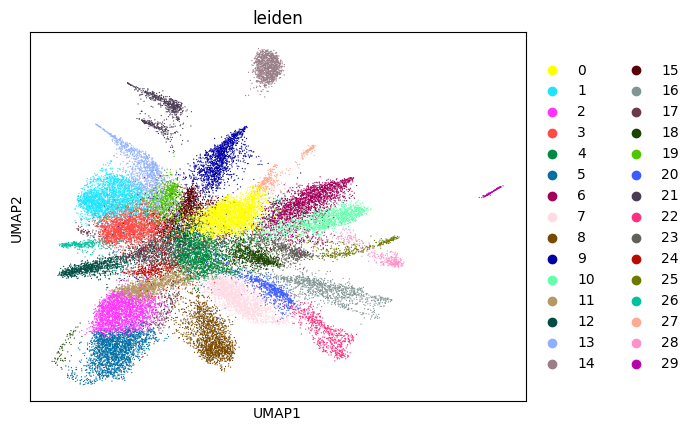

0.768120402410258 4


100%|██████████| 37510/37510 [00:44<00:00, 843.50it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


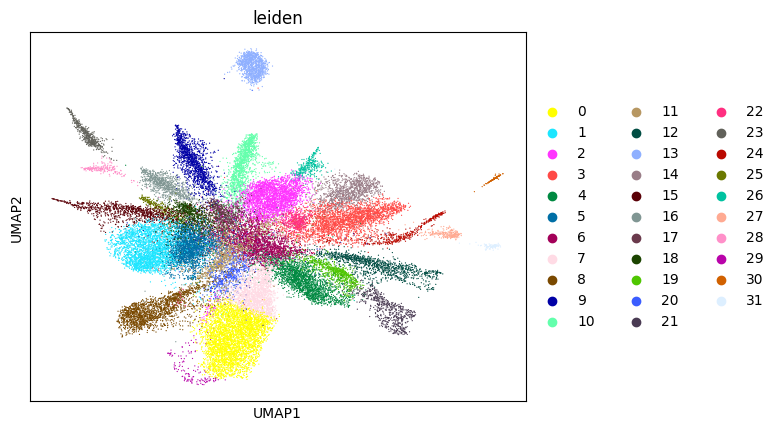

0.7677159498269409 5


100%|██████████| 37510/37510 [00:43<00:00, 857.60it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


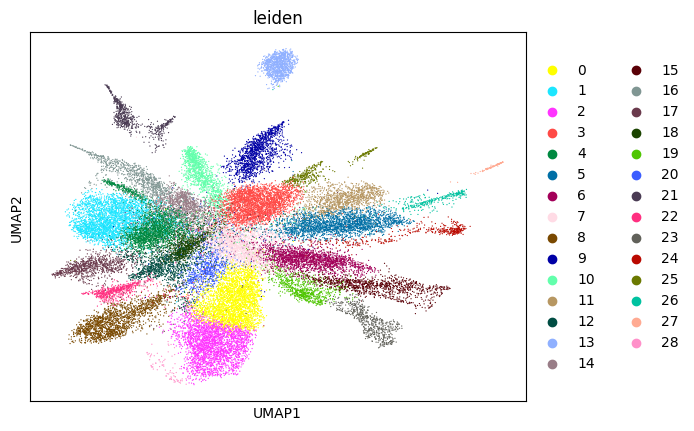

0.7829442394108971 6


100%|██████████| 37510/37510 [00:44<00:00, 852.25it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


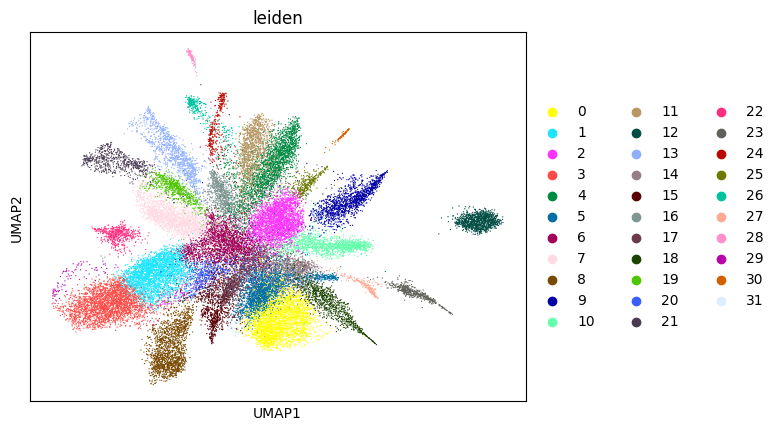

0.7914415175755809 7


100%|██████████| 37510/37510 [00:43<00:00, 858.65it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


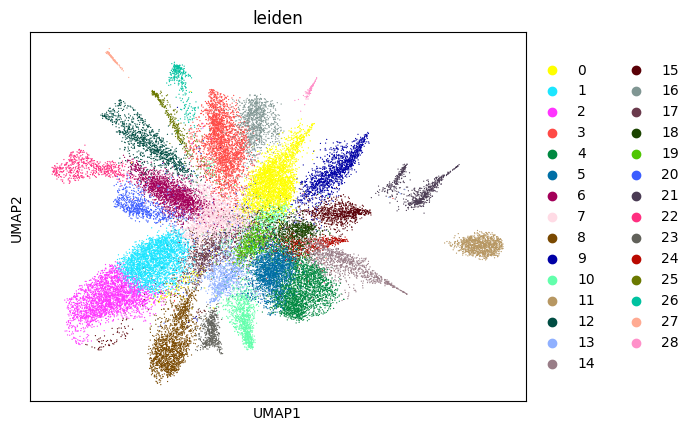

0.7789666075239687 8


100%|██████████| 37510/37510 [00:44<00:00, 847.70it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


/home/juanru/miniconda3/envs/cellposesuidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


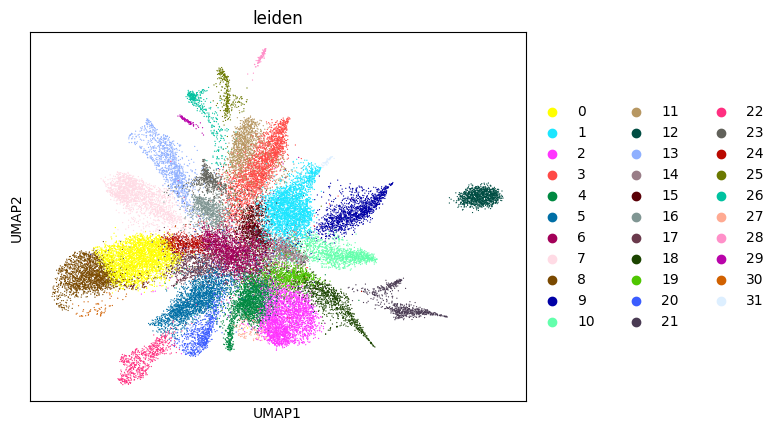

0.7777726511683621 9


In [13]:
cs.itering_arragement(adata_sc, adata_raw, adata, so, resolution=2, save_folder = 'results_example/')